Umbralización con técnica de isodata

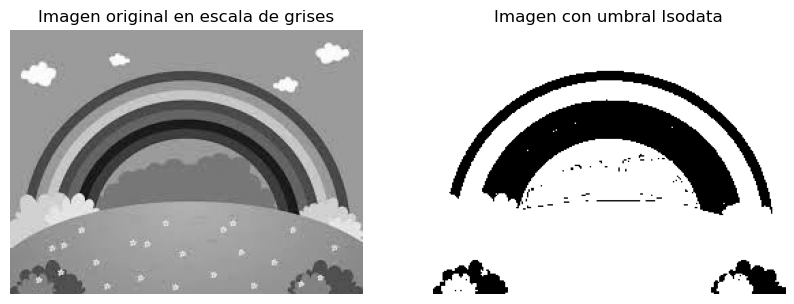

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isodata(imagen):
    umbral = 128
    while True:
        grupo1=imagen[imagen<=umbral]
        grupo2=imagen[imagen>=umbral]

        mediag1=np.mean(grupo1)
        mediag2=np.mean(grupo2)

        umbral_nuevo=(mediag1+mediag2)/2

        if abs(umbral_nuevo - umbral)<0.5:
            break
        umbral=umbral_nuevo
    return umbral
imagen=cv2.imread('3.jpeg',0)

umbral_isodata = isodata(imagen)

_,imagen_isodata=cv2.threshold(imagen, umbral_isodata,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.title('Imagen con umbral Isodata')
plt.imshow(imagen_isodata, cmap='gray')
plt.axis('off')

plt.show()

TÉCNICA DE DOS PICOS

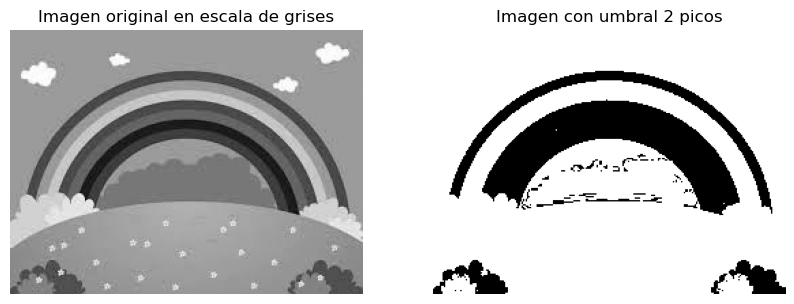

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dos_picos(imagen):
    hist=cv2.calcHist([imagen],[0], None,[256], [0,256])
    pico=np.array(hist)
    pico=pico.flatten()
    pico_dif=np.diff(pico)
    primer_pico=np.argmax(pico_dif[:128])
    segundo_pico=np.argmin(pico_dif[128:])+128
    umbral_2picos=(primer_pico+segundo_pico)/2
    return umbral_2picos
image=cv2.imread('3.jpeg',0)
umbral_2pic=dos_picos(imagen)

_,imagen_2picos=cv2.threshold(image, umbral_2pic,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.title('Imagen con umbral 2 picos')
plt.imshow(imagen_2picos, cmap='gray')
plt.axis('off')

plt.show()

Metodo OTSU

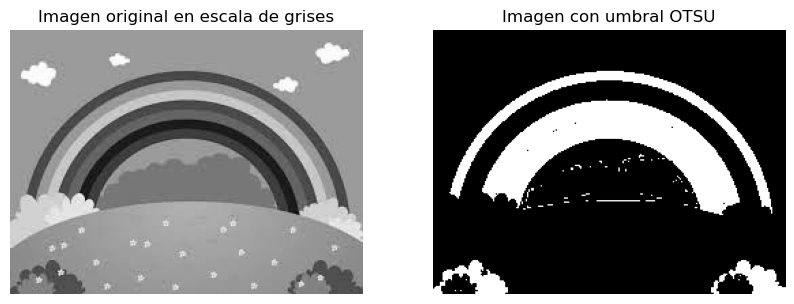

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image=cv2.imread('3.jpeg',0)
_,imagen_otsu=cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
umbral_imagen=np.where(image>imagen_otsu,255,0).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.title('Imagen con umbral OTSU')
plt.imshow(umbral_imagen, cmap='gray')
plt.axis('off')

plt.show()

UMBRALIZACIÓN VARIABLE - PARTICIÓN DE UNA IMAGEN

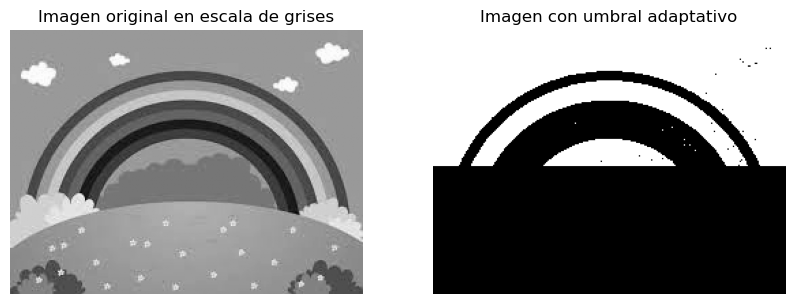

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

def variable_umb_blok(image,tam_bloq,c):
    umbral_ima=np.zeros_like(image)
    for y in range(0,image.shape[0], tam_bloq):
        for x in range(0,image.shape[1],tam_bloq):
            bloque= image[y:y+tam_bloq,x:x+tam_bloq]
            bloque_media=np.mean(bloque)
            umbral_adap=bloque_media-c
            umbral_ima[y:y+tam_bloq,x:x+tam_bloq]=(bloque>umbral_adap)*255
        return umbral_ima
image=cv2.imread('2.png',0)
tam_bloq=100 #se cambia el tamaño del bloquee
c=10
umbral_img_adap=variable_umb_blok(image,tam_bloq,c)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.title('Imagen con umbral adaptativo')
plt.imshow(umbral_img_adap, cmap='gray')
plt.axis('off')

plt.show()

con desviacion

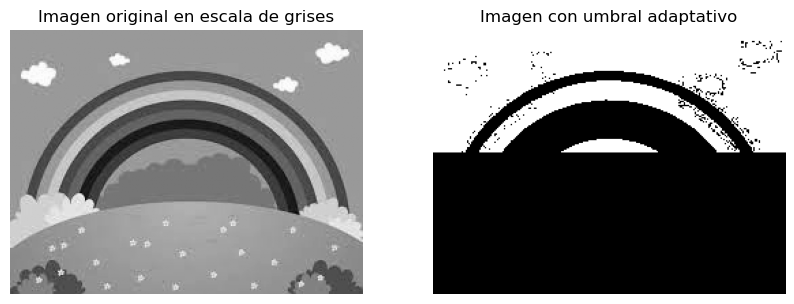

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

def umbra_var2(imagen,tam_bloq,ajuste):
    umbral_ima=np.zeros_like(image)
    for y in range(0,image.shape[0], tam_bloq):
        for x in range(0,image.shape[1],tam_bloq):
            bloque=image[y:y+tam_bloq,x:x+tam_bloq]
            bloque_media=np.mean(bloque)
            des=np.std(bloque)
            umbral_adap=bloque_media-(ajuste*des)
            umbral_ima[y:y+tam_bloq,x:x+tam_bloq]=(bloque>umbral_adap)*255
        return umbral_ima

image=cv2.imread('2.png',0)
tam_bloq=90 #se cambia el tamaño del bloquee
c=0.8
umbral_=variable_umb_blok(image,tam_bloq,c)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.title('Imagen con umbral adaptativo')
plt.imshow(umbral_, cmap='gray')
plt.axis('off')

plt.show()

ADAPTATIVA CON VENTANA

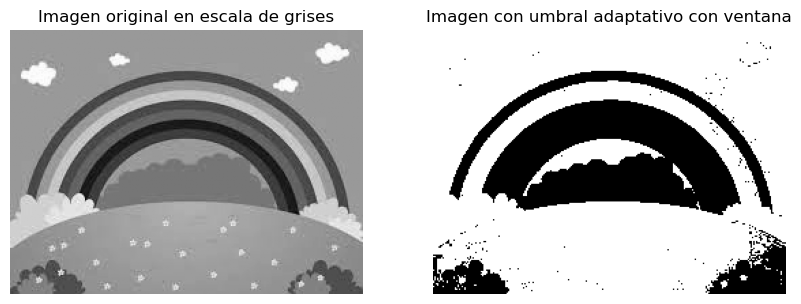

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

def ventana(imagen,ventana, factor):
    umbre_image=np.zeros_like(imagen)
    pad=ventana//2
    padd_imge=cv2.copyMakeBorder(imagen,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
    for y in range(imagen.shape[0]):
        for x in range(imagen.shape[1]):
            ventana1=padd_imge[y:y+ventana,x:x+ventana]
            media=np.mean(ventana1)
            dis=np.std(ventana1)
            umbral=media-(factor*dis)
            umbre_image[x,y]=255 if imagen[y,x]>umbral else 0
    return umbre_image

image=cv2.imread('2.png',0)
tam_bloq=200 #se cambia el tamaño del bloquee
c=2
umbral_=variable_umb_blok(image,tam_bloq,c)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.title('Imagen con umbral adaptativo con ventana')
plt.imshow(umbral_, cmap='gray')
plt.axis('off')

plt.show()

adaptativo 

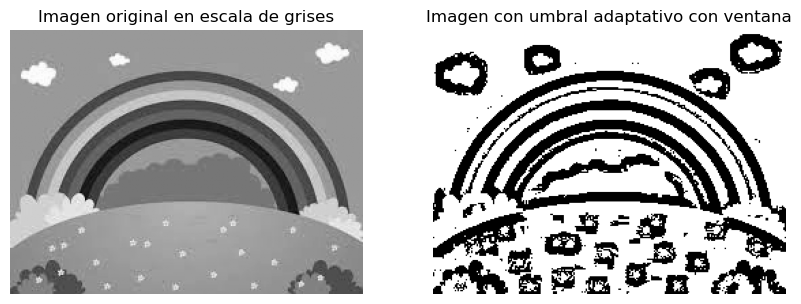

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image=cv2.imread('2.png',0)
ventana=15
factor=2
imagen_umbr=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,ventana,factor)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.title('Imagen con umbral adaptativo con ventana')
plt.imshow(imagen_umbr, cmap='gray')
plt.axis('off')

plt.show()